In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

In [67]:
import matplotlib.pyplot as plt

In [114]:
import pandas as pd 
import numpy as np
from pandas import DataFrame as df
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# NOTE: realized that i should've just one hotted everything cry cry 

grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}


# should i include subgrades? idk felt lazy
# no need i think we decided no subgrades for now

emp_mapping = {'1 year': 1,
 '10+ years': 10,
 '2 years': 2,
 '3 years': 3,
 '4 years': 4,
 '5 years': 5,
 '6 years': 6,
 '7 years': 7,
 '8 years': 8,
 '9 years': 9,
 '< 1 year': 0.5}

home_ownership_mapping = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'NONE': 3, 'ANY': 4, 'OTHER': 5}

verification_mapping = {'Verified': 0, 'Source Verified': 1, 'Not Verified': 2}

loan_mapping = {'Fully Paid': 0, 'Charged Off': 1}


def prepare_data(data, drop_cols, percent_cols, date_cols, test=False):
    """
    Prepares data from csv file. 

    Input: name of csv file, array of columns to drop, array of 
    percent columns to convert, and boolean on whether it is test data or not

    Output: X and y (y labels are not outputted if preparing test data)
    """
    # df.dropna(data)
    for col in drop_cols:
        data.drop(col, axis=1, inplace=True) 
    for col in percent_cols:
        data[col] = pd.to_numeric(data[col].str.strip('%')).div(100)

    data = data.replace({"grade": grade_mapping})

    data = data.replace({"emp_length": emp_mapping})

    # data = data.replace({"home_ownership": home_ownership_mapping})

    # data = data.replace({"verification_status": verification_mapping})

    # data = data.replace({"loan_status": loan_mapping})
    
    loan_mapping = {'Fully Paid': 0, 'Charged Off': 1}
    data = data.replace({"loan_status": loan_mapping})

    for col in date_cols:
        data[col] = pd.to_numeric(data[col].str[4:])
        
    return data

#     if not test: 
#         X = data.iloc[:,:-1]
#         # X = X.apply(LabelEncoder().fit_transform)
#         y = data.iloc[:, -1]
#         return X,y

#     else:
#         X = data
#         # X = X.apply(LabelEncoder().fit_transform)
#         return X, _


# names of columns to drop 
drop = ['sub_grade',
        'emp_title',
        'title',
        'zip_code',
        'mort_acc',
        'application_type']

# names of percent columns lol
percent = ['int_rate', 'revol_util']

# cols with dates to converts to ints
date = ['earliest_cr_line', 'issue_d']

# X_train_pre, y_train_pre = prepare_data('LOANS_TRAIN.csv', drop, percent, date, test=False)
# X_test_real, _ = prepare_data('LOANS_TEST.csv', drop, percent, date, test=True)



In [115]:
train_vals = pd.read_csv('LOANS_TRAIN.csv', index_col='id')
X_train = train_vals.iloc[:, :-1]
y_train = train_vals.iloc[:, -1]
X_test_real = pd.read_csv('LOANS_TEST.csv', index_col='id')

In [116]:
np.shape(X_train)

(197250, 27)

In [117]:
pool_x = pd.concat([X_train, X_test_real])
pool_x = prepare_data(pool_x, drop, percent, date, test=True)

In [118]:
pool_x

,loan_amnt,term_(months),int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,
0,5000.0,36,0.1065,162.87,6,10.0,RENT,24000.0,Verified,2011,...,AZ,27.65,1985,3.0,0.0,13648.0,0.837,9.0,f,0.0
1,2500.0,60,0.1527,59.83,5,0.5,RENT,30000.0,Source Verified,2011,...,GA,1.00,1999,3.0,0.0,1687.0,0.094,4.0,f,0.0
2,2400.0,36,0.1596,84.33,5,10.0,RENT,12252.0,Not Verified,2011,...,IL,8.72,2001,2.0,0.0,2956.0,0.985,10.0,f,0.0
3,10000.0,36,0.1349,339.31,5,10.0,RENT,49200.0,Source Verified,2011,...,CA,20.00,1996,10.0,0.0,5598.0,0.210,37.0,f,0.0
4,3000.0,60,0.1269,67.79,6,1.0,RENT,80000.0,Source Verified,2011,...,OR,17.94,1996,15.0,0.0,27783.0,0.539,38.0,f,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242475,35000.0,60,0.2328,992.31,2,10.0,MORTGAGE,110300.0,Verified,2012,...,WA,19.53,1990,12.0,0.0,49477.0,0.936,18.0,f,0.0
242476,21625.0,60,0.1433,506.89,5,10.0,RENT,56498.0,Verified,2012,...,SC,19.01,2003,7.0,0.0,15495.0,0.585,18.0,f,0.0
242477,30000.0,60,0.2197,828.06,3,10.0,RENT,87600.0,Verified,2012,...,VA,11.86,1994,9.0,0.0,12804.0,0.744,11.0,f,0.0


In [119]:
num_features = pool_x.select_dtypes(include=['int64', 'float64']).columns
cat_features = pool_x.select_dtypes(include=['object']).columns

In [120]:
cat_imp = SimpleImputer(strategy='constant', fill_value='missing')
num_imp = SimpleImputer(strategy='median')

In [121]:
for num in num_features:
    pool_x[num] = num_imp.fit_transform(pool_x[[num]]).ravel()

In [122]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [123]:
pool_x = encode_and_bind(pool_x, 'purpose')
pool_x = encode_and_bind(pool_x, 'addr_state')
pool_x = encode_and_bind(pool_x, 'initial_list_status')
pool_x = encode_and_bind(pool_x, 'home_ownership')
pool_x = encode_and_bind(pool_x, 'verification_status')

In [124]:
X_train = pool_x.iloc[:len(X_train)]
X_test_real = pool_x.iloc[len(X_train):]

In [125]:
for i in list(X_train):
    if i not in list(X_test_real):
        print(i)

In [126]:
for i in list(X_test_real):
    if i not in list(X_train):
        print(i)

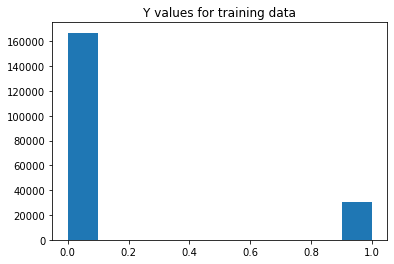

In [106]:
plt.hist(y_train_pre)
plt.title('Y values for training data')
plt.savefig('ytrain.png')

In [127]:
bad_loans = np.where(y_train_pre == 1)
good_loans = np.where(y_train_pre == 0)

In [128]:
bad_loans_x = X_train_pre.iloc[bad_loans]
bad_loans_y = y_train_pre.iloc[bad_loans]

In [129]:
bad_loans_x4 = pd.concat([bad_loans_x, bad_loans_x, bad_loans_x, bad_loans_x])
bad_loans_y4 = pd.concat([bad_loans_y, bad_loans_y, bad_loans_y, bad_loans_y])

In [130]:
X_train = X_train_pre
y_train = y_train_pre

In [131]:
sample_weight = np.ones(shape = (len(y_train),))

In [132]:
sample_weight[bad_loans] = len(good_loans[0]) / len(bad_loans[0])

In [133]:
X_train = X_train.astype(float)
X_test_real = X_test_real.astype(float)

ValueError: could not convert string to float: ' 10.65%'

In [59]:
np.shape(X_test_real)

(42480, 92)

In [91]:
list(X_train)

['loan_amnt',
 'term_(months)',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'annual_inc',
 'issue_d',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'addr_state_AK',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_state_FL',
 'addr_state_GA',
 'addr_state_HI',
 'addr_state_IA',
 'addr_state_ID',
 'addr_state_IL',
 'addr_state_IN',
 'addr_state_KS',
 'addr_state_KY',
 'addr_state_LA',
 'addr_state_MA',
 'addr_state_MD',
 'addr_state_ME',
 'addr_state_MI',
 'addr_state_MN',
 'addr_sta

In [92]:
plt.scatter(X_train["loan_amt"], y_train)

KeyError: 'loan_amt'

In [154]:
# X_train = X_train[~np.isnan(X_train).any(axis=1)]
# X_test_real = X_test_real[~np.isnan(X_test_real).any(axis=1)]

In [155]:
np.isnan(X_train).any().any()

False

In [60]:
np.shape(X_train)

(197250, 92)

In [157]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_real = scaler.fit_transform(X_test_real)

In [163]:
model = Sequential()

model.add(Dense(90, activation='relu', input_shape=(93,))),
model.add(Dense(180, activation='relu')),
model.add(Dense(256, activation='relu')),
model.add(Dense(512, activation='relu')),
model.add(Dense(1024, activation='relu')),
model.add(Dense(1024, activation='relu')),
model.add(Dense(1024, activation='relu')),
model.add(Dense(1024, activation='relu')),
model.add(Dense(1024, activation='relu')),
model.add(Dense(512, activation='relu')),
model.add(Dense(256, activation='relu')),
model.add(Dense(128, activation='relu')),
model.add(Dense(64, activation='relu')),
model.add(Dense(32, activation='relu')),
model.add(Dense(16, activation='relu')),
model.add(Dense(1, activation='sigmoid', name="score"))

model.compile(loss = "binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-5), metrics=['accuracy'])

In [164]:
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_test_real = tf.convert_to_tensor(X_test_real)

In [165]:
class_weight = {0: 1, 1: len(good_loans[0]) / len(bad_loans[0])}
class_weight

{0: 1, 1: 5.526270513499206}

In [166]:
model.fit(X_train, y_train, epochs=10, batch_size = 128, validation_split = 0.2, class_weight=class_weight)

Epoch 1/10
1233/1233 [==============================] - 45s 36ms/step - loss: 1.1381 - accuracy: 0.5819 - val_loss: 0.7071 - val_accuracy: 0.5879
Epoch 2/10
1233/1233 [==============================] - 43s 35ms/step - loss: 1.1062 - accuracy: 0.6306 - val_loss: 0.5859 - val_accuracy: 0.7145
Epoch 3/10
1233/1233 [==============================] - 43s 35ms/step - loss: 1.0936 - accuracy: 0.6214 - val_loss: 0.6586 - val_accuracy: 0.6137
Epoch 4/10
1233/1233 [==============================] - 47s 38ms/step - loss: 1.0865 - accuracy: 0.6189 - val_loss: 0.5839 - val_accuracy: 0.6982
Epoch 5/10
1233/1233 [==============================] - 46s 37ms/step - loss: 1.0808 - accuracy: 0.6152 - val_loss: 0.6495 - val_accuracy: 0.6185
Epoch 6/10
1233/1233 [==============================] - 44s 36ms/step - loss: 1.0754 - accuracy: 0.6148 - val_loss: 0.6399 - val_accuracy: 0.6229
Epoch 7/10
1233/1233 [==============================] - 46s 37ms/step - loss: 1.0700 - accuracy: 0.6133 - val_loss: 0.6884 -

In [62]:
model.save("Models/model1/first_weighted_model74")

INFO:tensorflow:Assets written to: Models/model1/first_weighted_model74\assets


In [80]:
saved_model = tf.keras.models.load_model('model1/first_weighted_model74')

In [168]:
np.shape(X_test_real)

TensorShape([42480, 93])

In [170]:
model.predict(X_test_real)

array([[0.1926063 ],
       [0.47023967],
       [0.3542479 ],
       ...,
       [0.71973574],
       [0.3178196 ],
       [0.6207911 ]], dtype=float32)

In [32]:
steps=[('preprocessor', preprocessor),('classifier', model)]
pipe = Pipeline(steps)

In [172]:
predictions = pipe.predict_proba(X_test_real)[:,0]
ids = X_test_real.index
df = pd.DataFrame({'id': ids, 'loan_status': predictions})
out = df.to_csv('out.csv', index=False)  

AttributeError: 'Sequential' object has no attribute 'predict_proba'